In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import multioutput
from sklearn import multiclass
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm
from sklearn import tree

In [2]:
os.chdir('C:/Users/tku/Desktop/data/finish')
filename = 'pg.csv'
df = pd.read_csv(filename)
df_dum = pd.get_dummies(df)
list(df_dum)

['chinese',
 'english',
 'math',
 'society',
 'science',
 'PR',
 'H_GPA',
 'PG',
 'PG_10_A',
 'PG_10_B',
 'PG_10_C',
 'PG_10_D',
 'PG_10_E',
 'PG_10_F',
 'PG_10_G',
 'PG_10_H',
 'PG_10_I',
 'PG_10_J',
 'PG_5_A',
 'PG_5_B',
 'PG_5_C',
 'PG_5_D',
 'PG_5_F',
 'PG_3_A',
 'PG_3_B',
 'PG_3_F',
 'PG_2_A',
 'PG_2_F']

In [3]:
train_set,  test_set = \
              np.split(df_dum.sample(frac=1, random_state=1), 
                       [int(.9*len(df_dum))])

In [4]:
X_train = train_set[['chinese', 'english', 'math', 'society', 'science', 'PR', 'H_GPA']]
#X_validate = validate_set[['chinese', 'english', 'math', 'society', 'science', 'PR', 'H_GPA']]
X_test = test_set[['chinese', 'english', 'math', 'society', 'science', 'PR', 'H_GPA']]

Y_train10= train_set[['PG_10_A', 'PG_10_B', 'PG_10_C', 'PG_10_D', 'PG_10_E', 'PG_10_F', 'PG_10_G', 'PG_10_H', 'PG_10_I', 'PG_10_J']]
#Y_validate10= validate_set[['PG_10_A', 'PG_10_B', 'PG_10_C', 'PG_10_D', 'PG_10_E', 'PG_10_F', 'PG_10_G', 'PG_10_H','PG_10_I', 'PG_10_J']]
Y_test10= test_set[['PG_10_A', 'PG_10_B', 'PG_10_C', 'PG_10_D', 'PG_10_E', 'PG_10_F', 'PG_10_G', 'PG_10_H','PG_10_I', 'PG_10_J']]

Y_train5= train_set[['PG_5_A', 'PG_5_B', 'PG_5_C', 'PG_5_D', 'PG_5_F']]
#Y_validate5= validate_set[['PG_5_A', 'PG_5_B', 'PG_5_C', 'PG_5_D', 'PG_5_F']]
Y_test5= test_set[['PG_5_A', 'PG_5_B', 'PG_5_C', 'PG_5_D', 'PG_5_F']]

Y_train3= train_set[['PG_3_A', 'PG_3_B', 'PG_3_F']]
#Y_validate3= validate_set[['PG_3_A', 'PG_3_B', 'PG_3_F']]
Y_test3= test_set[['PG_3_A', 'PG_3_B', 'PG_3_F']]

Y_train2= train_set[['PG_2_A', 'PG_2_F']]
#Y_validate2= validate_set[['PG_2_A', 'PG_2_F']]
Y_test2= test_set[['PG_2_A', 'PG_2_F']]

# RandomForest

In [5]:
n_estimators = 5

In [6]:
RF10 = RandomForestClassifier(n_estimators=n_estimators)
RF10.fit(X_train,Y_train10)
pred10=RF10.predict(X_test)
target_names10 = ['A','B','C','D','E','F','G','H','I','J']
score10 = metrics.classification_report(Y_test10,pred10,target_names=target_names10)
print("  ")
print(score10)
print("accuracy_score：%.2f%%" % (metrics.accuracy_score(Y_test10,pred10)*100),)

  
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00         3
           C       0.00      0.00      0.00         8
           D       0.25      0.14      0.18         7
           E       0.25      0.25      0.25         4
           F       0.00      0.00      0.00         3
           G       0.00      0.00      0.00         1
           H       0.00      0.00      0.00         1
           I       0.00      0.00      0.00         0
           J       0.00      0.00      0.00         1

   micro avg       0.14      0.06      0.09        33
   macro avg       0.05      0.04      0.04        33
weighted avg       0.08      0.06      0.07        33
 samples avg       0.06      0.06      0.06        33

accuracy_score：6.06%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
RF5 = RandomForestClassifier(n_estimators=n_estimators)
RF5.fit(X_train,Y_train5)
pred5=RF5.predict(X_test)
target_names5 = ['A','B','C','D','F']
score5 = metrics.classification_report(Y_test5,pred5,target_names=target_names5)
print("  ")
print(score5)
print("accuracy_score：%.2f%%" % (metrics.accuracy_score(Y_test5,pred5)*100),)

  
              precision    recall  f1-score   support

           A       1.00      0.20      0.33         5
           B       0.00      0.00      0.00         3
           C       0.14      0.11      0.12         9
           D       0.20      0.12      0.15         8
           F       0.50      0.62      0.56         8

   micro avg       0.33      0.24      0.28        33
   macro avg       0.37      0.21      0.23        33
weighted avg       0.36      0.24      0.26        33
 samples avg       0.24      0.24      0.24        33

accuracy_score：24.24%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
RF3= RandomForestClassifier(n_estimators=n_estimators)
RF3.fit(X_train,Y_train3)
pred3=RF3.predict(X_test)
target_names3 = ['A','B','F']
score3 = metrics.classification_report(Y_test3,pred3,target_names=target_names3)
print("  ")
print(score3)
print("accuracy_score：%.2f%%" % (metrics.accuracy_score(Y_test3,pred3)*100),)

  
              precision    recall  f1-score   support

           A       0.60      0.38      0.46         8
           B       0.54      0.47      0.50        15
           F       0.78      0.70      0.74        10

   micro avg       0.63      0.52      0.57        33
   macro avg       0.64      0.51      0.57        33
weighted avg       0.63      0.52      0.56        33
 samples avg       0.52      0.52      0.52        33

accuracy_score：51.52%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
RF2= RandomForestClassifier(n_estimators=n_estimators)
RF2.fit(X_train,Y_train2)
pred2=RF2.predict(X_test)
target_names2 = ['A','F']
score2 = metrics.classification_report(Y_test2,pred2,target_names=target_names2)
print("  ")
print(score2)
print("accuracy_score：%.2f%%" % (metrics.accuracy_score(Y_test2,pred2)*100),)

  
              precision    recall  f1-score   support

           A       0.91      0.84      0.87        25
           F       0.60      0.75      0.67         8

   micro avg       0.82      0.82      0.82        33
   macro avg       0.76      0.79      0.77        33
weighted avg       0.84      0.82      0.82        33
 samples avg       0.82      0.82      0.82        33

accuracy_score：81.82%


In [10]:
Y_pred10c = pred10
Y_test10c = Y_test10.to_numpy()
Y_pred5c = pred5
Y_test5c = Y_test5.to_numpy()

In [11]:
oneAway10 =1
            
for i in range(Y_pred10c.shape[0]):
    for j in range(Y_pred10c.shape[1]):
        if Y_test10c[i,j] == 1:
            if j == 0:
                if Y_pred10c[i,j] == 1 or Y_pred10c[i,j+1] == 1:
                    oneAway10 = oneAway10 +1
            elif j == Y_pred10c.shape[1]-1:
                if Y_pred10c[i,j-1] == 1 or Y_pred10c[i,j] == 1:
                    oneAway10 = oneAway10 +1
            else:
                if Y_pred10c[i,j-1] == 1 or Y_pred10c[i,j] or Y_pred10c[i,j+1] == 1:
                    oneAway10 = oneAway10 +1
            break
print("oneAway accurency of 10class =%.2f%%" % (oneAway10/Y_pred10c.shape[0]*100))

oneAway5 =1
            
for i in range(Y_pred5c.shape[0]):
    for j in range(Y_pred5c.shape[1]):
        if Y_test5c[i,j] == 1:
            if j == 0:
                if Y_pred5c[i,j] == 1 or Y_pred5c[i,j+1] == 1:
                    oneAway5 = oneAway5 +1
            elif j == 3:
                if Y_pred5c[i,j-1] == 1 or Y_pred5c[i,j] == 1:
                    oneAway5 = oneAway5 +1
            elif j == 4:
                if Y_pred5c[i,j] == 1:
                    oneAway5 = oneAway5 +1
            else:
                if Y_pred5c[i,j-1] == 1 or Y_pred5c[i,j] or Y_pred5c[i,j+1] == 1:
                    oneAway5 = oneAway5 +1
            break
print("oneAway accurency of 5class =%.2f%%" % (oneAway5/Y_pred5c.shape[0]*100))

oneAway accurency of 10class =27.27%
oneAway accurency of 5class =48.48%


In [12]:
from tempfile import NamedTemporaryFile
import shutil
import csv


fields = ['pg','c10_accur','c10_oneAway','c5_accur','c5_oneAway','c3_accur','c2_accur']
writelist = ["RF","pg",
             "%.2f%%" % (metrics.accuracy_score(Y_test10,pred10)*100),"%.2f%%" % (oneAway10/Y_pred10c.shape[0]*100),
             "%.2f%%" % (metrics.accuracy_score(Y_test5,pred5)*100),"%.2f%%" % (oneAway5/Y_pred5c.shape[0]*100),
             "%.2f%%" % (metrics.accuracy_score(Y_test3,pred3)*100),"%.2f%%" % (metrics.accuracy_score(Y_test2,pred2)*100)]

with open('result.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(writelist)
    csvfile.close()

 1) H_GPA                          0.250480
 2) PR                             0.153332
 3) science                        0.134289
 4) english                        0.131678
 5) chinese                        0.123372
 6) math                           0.104252
 7) society                        0.102597


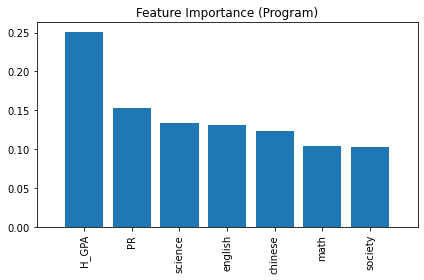

In [13]:
imp10 = RF10.feature_importances_
imp5 = RF10.feature_importances_
imp3 = RF10.feature_importances_
imp2 = RF10.feature_importances_
imp = []

for f in range(X_train.shape[1]):
    imp.append((imp10[f] + imp5[f] + imp3[f] + imp2[f])/4)
    
indices = np.argsort(imp)[::-1]

feat_labels = df.columns[0:7]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            imp[indices[f]]))

plt.title('Feature Importance (Program)')
plt.bar(range(X_train.shape[1]), 
        np.array(imp)[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

In [14]:
writelist = ["pg",
            int(round(imp[0]*100)),int(round(imp[1]*100)),int(round(imp[2]*100)),
            int(round(imp[3]*100)),int(round(imp[4]*100)),int(round(imp[5]*100)),
            int(round(imp[6]*100))]
with open('result_FI.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(writelist)
    csvfile.close()